In [1]:
import pandas as pd
import numpy as np

from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from IPython.display import display
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
print('Packages for Mathematical Computation and visualization imported!')

Packages for Mathematical Computation and visualization imported!


In [2]:
df1 = pd.read_csv("datasets\cleanedbasic\leeds20-21.csv")
df2 = pd.read_csv("datasets\cleanedbasic\leeds21-22.csv")

In [3]:
df2.tail()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Per90G+A-PK,xG,npxG,xA,npxG+xAG,Per90xG,Per90xA,Per90xG+xA,Per90npxG,Per90npxG+xAG
26,Hélder Costa,ao ANG,MF,27.0,1,0,22,0.2,0,0,...,0.00,0.0,0.0,0.0,0.0,0.11,0.00,0.11,0.11,0.11
27,Liam McCarron,sct SCO,FW,20.0,1,0,10,0.1,0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
28,Stuart McKinstry,sct SCO,MF,18.0,1,0,4,0.0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
29,Squad Total,NaN,NaN,26.1,38,418,3420,38.0,42,26,...,1.66,50.4,46.5,35.8,82.3,1.33,0.94,2.27,1.22,2.17
30,Opponent Total,NaN,NaN,26.9,38,418,3420,38.0,78,59,...,3.47,73.2,69.3,52.8,122.1,1.93,1.39,3.31,1.82,3.21


In [4]:
df1.tail()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Per90G+A-PK,xG,npxG,xA,npxG+xAG,Per90xG,Per90xA,Per90xG+xA,Per90npxG,Per90npxG+xAG
20,Ian Carlo Poveda,eng ENG,MFDF,20.0,14,0,355,3.9,0,0,...,0.00,0.4,0.4,0.8,1.2,0.09,0.21,0.30,0.09,0.30
21,Niall Huggins,wls WAL,DF,19.0,1,0,38,0.4,0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
22,Leif Davis,eng ENG,DF,20.0,2,0,33,0.4,0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
23,Squad Total,NaN,NaN,26.1,38,418,3420,38.0,60,45,...,2.66,55.6,52.5,41.9,94.3,1.46,1.10,2.57,1.38,2.48
24,Opponent Total,NaN,NaN,26.5,38,418,3420,38.0,52,36,...,2.11,57.9,50.7,39.3,90.0,1.52,1.03,2.56,1.33,2.37


In [5]:
df1.shape

(25, 29)

In [6]:
df2.shape

(31, 29)

In [7]:
df1 = df1[df1['Min'] > 0]
df2 = df2[df2['Min'] > 0]

In [8]:
dftotals1 = df1.copy()
dftotals2 = df2.copy()

df1 = df1.iloc[:-2]
df2 = df2.iloc[:-2]

In [9]:
df1.dtypes

Player            object
Nation            object
Pos               object
Age              float64
MP                 int64
Starts             int64
Min                int64
90s              float64
Gls                int64
Ast                int64
G-PK               int64
PK                 int64
PKatt              int64
CrdY               int64
CrdR               int64
Per90Gls         float64
Per90Ast         float64
Per90G+A         float64
Per90G-PK        float64
Per90G+A-PK      float64
xG               float64
npxG             float64
xA               float64
npxG+xAG         float64
Per90xG          float64
Per90xA          float64
Per90xG+xA       float64
Per90npxG        float64
Per90npxG+xAG    float64
dtype: object

### Leeds United First Season VS Second Season Comparison

Leeds United fell firmly into the category of "second season syndrome" by achieving 59 points and a 9th place finish in their first season but only finishing 17th the following season, narrowly avoiding relegation. Firstly, we will look into some factors surrounding their squad such as player turnover between the two seasons, performance levels between the two seasons and more.

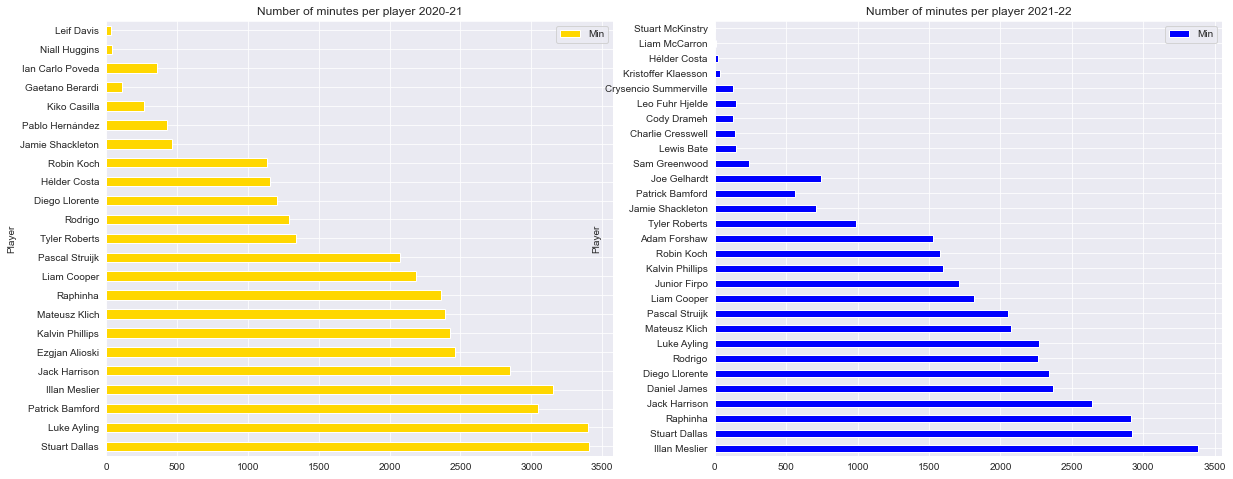

In [10]:
# first let's investigate squad turnover
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))
df1.plot.barh(x = 'Player', y = 'Min', ax = ax1, title = 'Number of minutes per player 2020-21',
             color = 'gold')
df2.plot.barh(x = 'Player', y = 'Min', ax = ax2, title = 'Number of minutes per player 2021-22',
             color = 'blue')
plt.show()

In [11]:
print("The number of players in Leeds United's 2020-21 squad was: " + str(len(df1.index)))
print("The number of players in Leeds United's 2021-22 squad was: " + str(len(df2.index)))

The number of players in Leeds United's 2020-21 squad was: 23
The number of players in Leeds United's 2021-22 squad was: 29


In [12]:
print("Mean minutes played in Leeds United's 2020-21 squad was: " + str(df1['Min'].mean()))
print("Mean minutes played in Leeds United's 2021-22 squad was: " + str(df2['Min'].mean()))

Mean minutes played in Leeds United's 2020-21 squad was: 1633.6521739130435
Mean minutes played in Leeds United's 2021-22 squad was: 1291.655172413793


We can see that there was certainly a higher turnover of players in Leeds' second season here. 6 more players were used and there appears to be a far larger spread of the minutes. There was 4 players who played over 3000 minutes in their first season but only 1 in their second season (Illan Meslier who is a keeper which would be expected from a goalkeeper). The mean number of minutes played also further illustrates this point. There is approximately 350 minutes of a difference in mean gametime of players (nearly 4 matches worth) which points towards injuries and/or loss of form to previously important players.

##### Let's look at performance metrics now. Firstly, we will focus on expected goals.

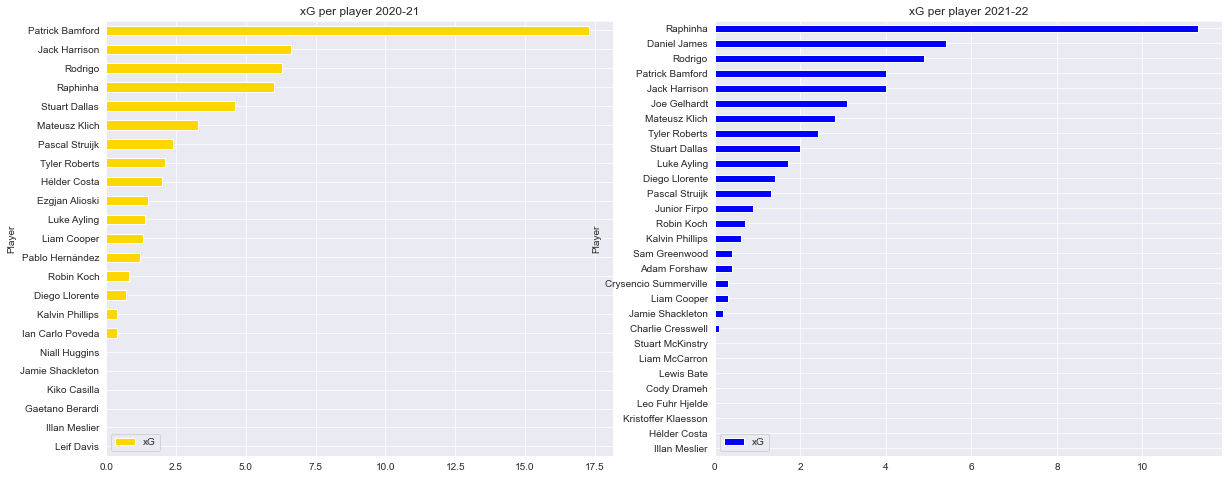

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
df_c1 = df1.sort_values('xG')
df_c2 = df2.sort_values('xG')
df_c1.plot.barh(x = 'Player', y = 'xG', ax = ax1, title = 'xG per player 2020-21',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'xG', ax = ax2, title = 'xG per player 2021-22',
             color='blue')
plt.show()

In [14]:
print("Team xG in Leeds United's 2020-21 squad was: " + str(sum(df1['xG'])))
print("Team xG in Leeds United's 2021-22 squad was: " + str(sum(df2['xG'])))

Team xG in Leeds United's 2020-21 squad was: 58.29999999999999
Team xG in Leeds United's 2021-22 squad was: 48.199999999999996


Let's investigate further. There is quite a large dropoff here from one season to the next in terms of xG which suggests Leeds United struggled to create chances more in their second season. Let's take "non-penalty xG" here. Penalties are a very high probability chance (roughly 0.8 likelihood of scoring) so removing these will give us a better indication of open play.

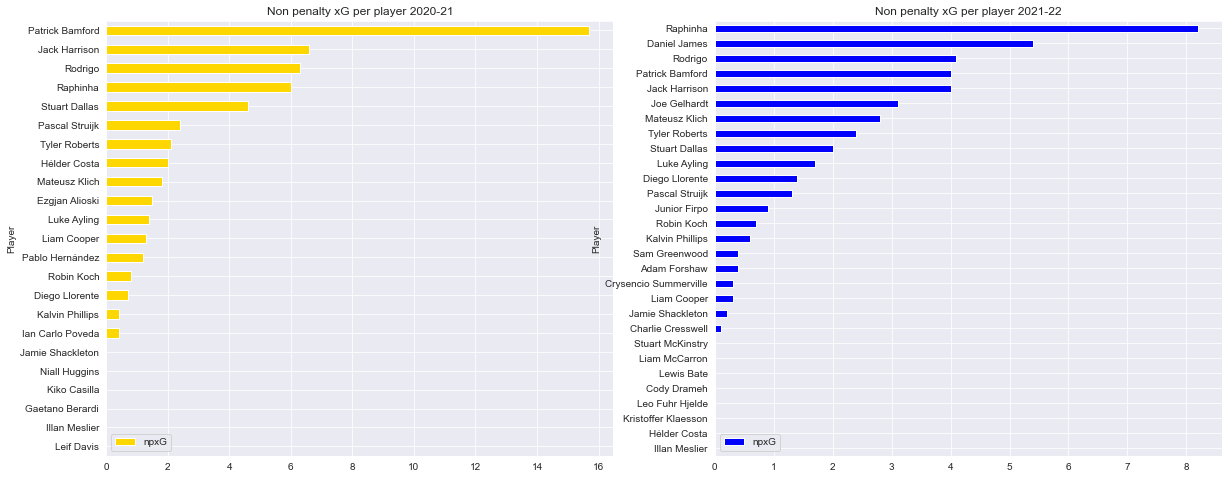

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('npxG')
df_c2 = df2.sort_values('npxG')
df_c1.plot.barh(x = 'Player', y = 'npxG', ax= ax1, title='Non penalty xG per player 2020-21',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'npxG', ax= ax2, title='Non penalty xG per player 2021-22',
             color='blue')
plt.show()

In [16]:
print("Non penalty team xG in Leeds United's 2020-21 squad was: " + str(sum(df1['npxG'])))
print("Non penalty team xG in Leeds United's 2021-22 squad was: " + str(sum(df2['npxG'])))

Non penalty team xG in Leeds United's 2020-21 squad was: 55.199999999999996
Non penalty team xG in Leeds United's 2021-22 squad was: 44.300000000000004


#### xG VS Actual Difference

In [17]:
df1['Actual - xG'] = df1['Gls'] - df1['xG']
df2['Actual - xG'] = df2['Gls'] - df2['xG']

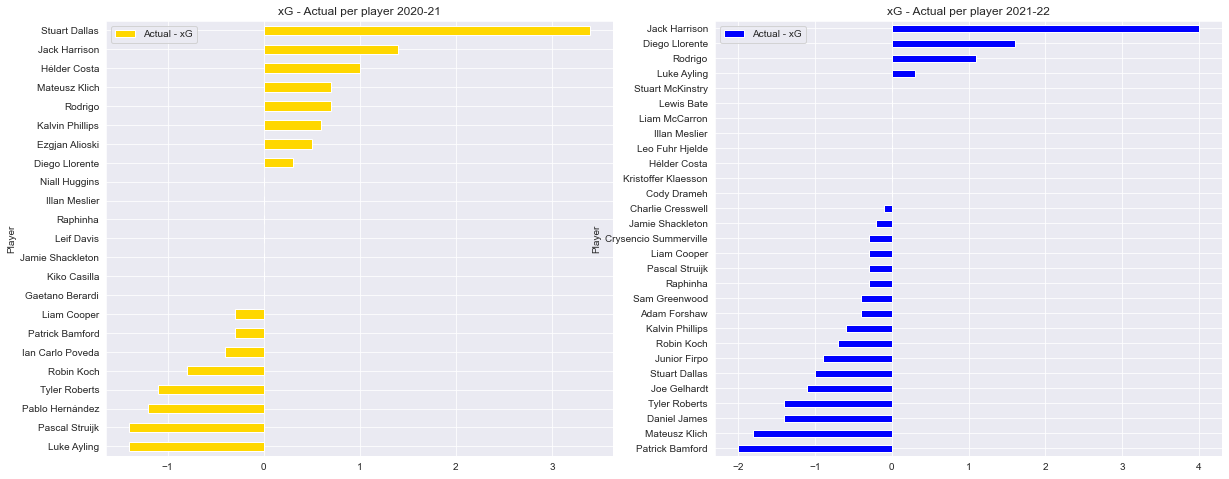

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
df_c1 = df1.sort_values('Actual - xG')
df_c2 = df2.sort_values('Actual - xG')
df_c1.plot.barh(x = 'Player', y = 'Actual - xG', ax= ax1, title='xG - Actual per player 2020-21',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Actual - xG', ax= ax2, title='xG - Actual per player 2021-22',
             color='blue')
plt.show()

We can see that a significant number of players underperformed their xG data in Leeds' second season when compared to their first, where the majority met expected goals or overachieved their xG. It is interesting to note that Leeds' top scorer in their first season Patrick Bamford underperformed in the second season despite the limited number of minutes he had in 2021-22. It also must be noted in the first season most of Leeds' "underperformers" (those who had a negative value in these top plots, were either defenders or had a limited amount of minutes. Most players playing regularly hit their expected number of goals which helped enable Leeds to enjoy a strong first season. The opposite is true in their second season where regular players did underperform their expected goals tallies and may be part of the reason why they fell foul of the "second season syndrome". 

### Let's now investigate Assists and expected assists (xA). This will allow us to see did Leeds United create high quality chances and if this was potentially a factor in their drop off across the two seasons.

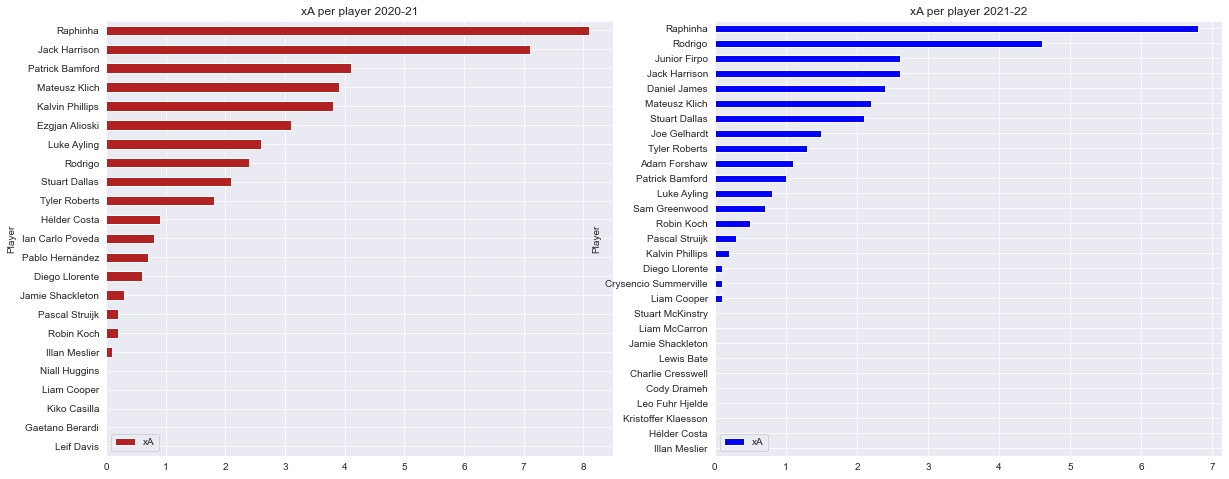

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
df_c1 = df1.sort_values('xA')
df_c2 = df2.sort_values('xA')
df_c1.plot.barh(x = 'Player', y = 'xA', ax = ax1, title = 'xA per player 2020-21',
             color = 'firebrick')
df_c2.plot.barh(x = 'Player', y = 'xA', ax = ax2, title = 'xA per player 2021-22',
             color = 'blue')
plt.show()

In [20]:
print("Team xA in Leeds United's 2020-21 squad was: " + str(sum(df1['xA'])))
print("Team xA in Leeds United's 2021-22 squad was: " + str(sum(df2['xA'])))

Team xA in Leeds United's 2020-21 squad was: 42.8
Team xA in Leeds United's 2021-22 squad was: 31.000000000000007


#### xA VS Actual Assists

In [21]:
df1['Actual - xA'] = df1['Ast'] - df1['xA']
df2['Actual - xA'] = df2['Ast'] - df2['xA']

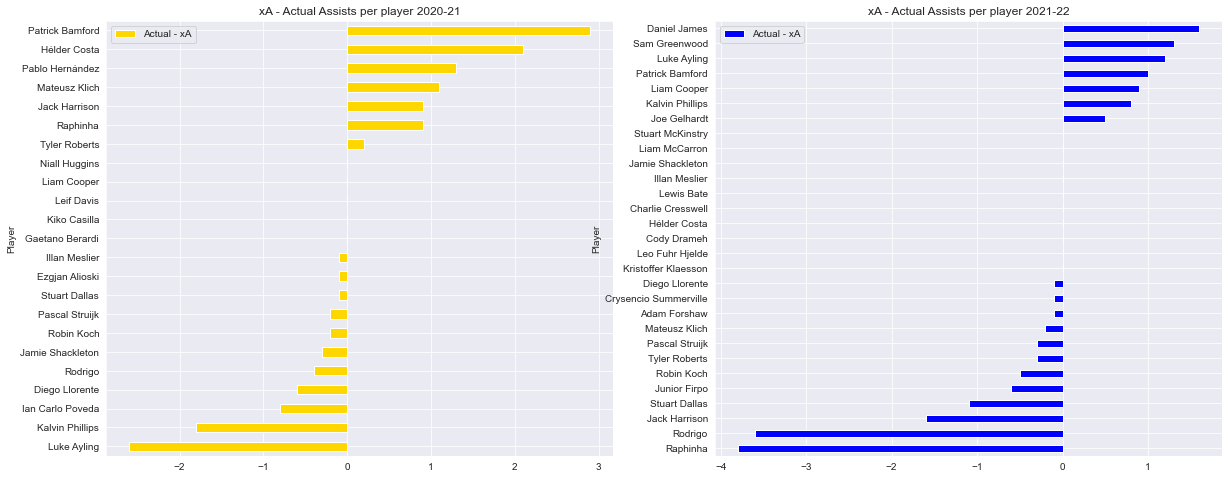

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('Actual - xA')
df_c2 = df2.sort_values('Actual - xA')
df_c1.plot.barh(x = 'Player', y = 'Actual - xA', ax= ax1, title='xA - Actual Assists per player 2020-21',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Actual - xA', ax= ax2, title='xA - Actual Assists per player 2021-22',
             color='blue')
plt.show()

In [23]:
print("Team actual minus xA in Leeds United's 2020-21 squad was: " + str(sum(df1['Actual - xA'])))
print("Team actual minus xA in Leeds United's 2021-22 squad was: " + str(sum(df2['Actual - xA'])))

Team actual minus xA in Leeds United's 2020-21 squad was: 2.200000000000001
Team actual minus xA in Leeds United's 2021-22 squad was: -5.0


In terms of the number of players in the squads for both seasons, there isn't a big difference in the number of players underperforming/overperforming their numbers. However, if we look at season two the three players who have seen the biggest underperformance in terms of assists (Raphinha, Rodrigo and Jack Harrison) they have a large underperformance in the number of assists they would commonly be expected to get given the areas they are creating chances from. This would be of concern in any team as these were Leeds' two wingers and attacking midfielder/striker for the majority of the season. This would feed in our earlier analysis of Leeds' second season showing they underperformed the number of goals they should have been expected to score. This is most likely due to the lack of a reliable goal scorer. If we look at some of our earlier findings we see that Leeds had a regular goalscorer in Patrick Bamford who met his high xG levels and played regularly. There was no forward in the data for 2021-22 that showed similar characteristics which suggests the lack of a reliable striker and failure to put away chances led to Leeds suffering the dreaded "second season syndrome".

### Per 90 comparisons

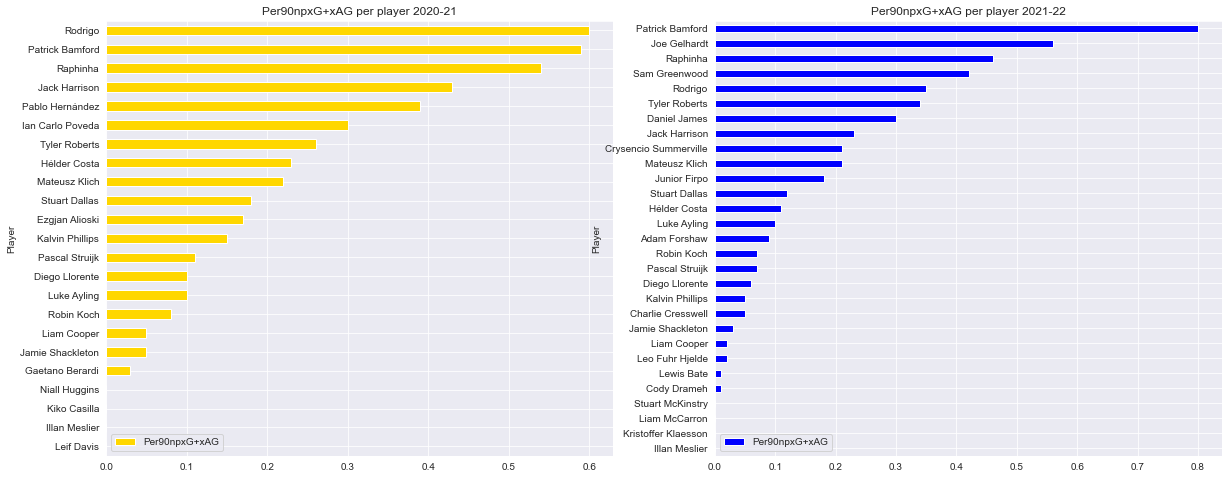

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('Per90npxG+xAG')
df_c2 = df2.sort_values('Per90npxG+xAG')
df_c1.plot.barh(x = 'Player', y = 'Per90npxG+xAG', ax= ax1, title='Per90npxG+xAG per player 2020-21',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Per90npxG+xAG', ax= ax2, title='Per90npxG+xAG per player 2021-22',
             color='blue')
plt.show()

### Let's now compare players who played in both seasons for Leeds
By doing this, it allows us to better understand if for example a significant turnover of players or a loss of form from previously key players led to their "second season syndrome". We will focus on minutes played and per 90 metrics here.

In [25]:
players1 = list(df1['Player'])
players2 = list(df2['Player'])
d = {}
for i in range(len(players1)):
    if players1[i] in players2:
        val = df2.loc[df2['Player'] == players1[i], "Per90npxG+xAG"].item()
        # subtract 2021/22 data from 2020/21 for players who played both seasons
        ## if result of this subtraction is negative then the player performance has regressed
        vals = val - df1.loc[df1['Player'] == players1[i], "Per90npxG+xAG"].item()
        d[players1[i]] = vals
    else:
        continue

In [26]:
per90commonplayers = pd.DataFrame.from_dict(d, orient='index')

In [27]:
per90commonplayers = per90commonplayers.reset_index()
per90commonplayers.rename(columns = {'index': 'Name', 0: 'SeasonDifferenceXGXA'}, inplace = True)

In [28]:
players1 = list(df1['Player'])
players2 = list(df2['Player'])
d1 = {}
for i in range(len(players1)):
    if players1[i] in players2:
        val = df2.loc[df2['Player'] == players1[i], "Min"].item()
        vals = val - df1.loc[df1['Player'] == players1[i], "Min"].item()
        d1[players1[i]] = vals
    else:
        continue

In [29]:
minscommonplayers = pd.DataFrame.from_dict(d1, orient = 'index')
minscommonplayers = minscommonplayers.reset_index()
minscommonplayers.rename(columns = {'index': 'Name', 0: 'SeasonDifferenceMins'}, inplace = True)

In [30]:
result = pd.merge(minscommonplayers, per90commonplayers, on = ["Name"])

In [31]:
result.head()

,Name,SeasonDifferenceMins,SeasonDifferenceXGXA
0,Stuart Dallas,-490,-0.06
1,Luke Ayling,-1127,0.00
2,Patrick Bamford,-2491,0.21
3,Illan Meslier,234,0.00
4,Jack Harrison,-208,-0.20


<AxesSubplot:title={'center':'Per90XG+XA Difference for Leeds United players who played in 2020/21 and 2021/22 seasons'}, xlabel='Player Name', ylabel='Per90XG+XA'>

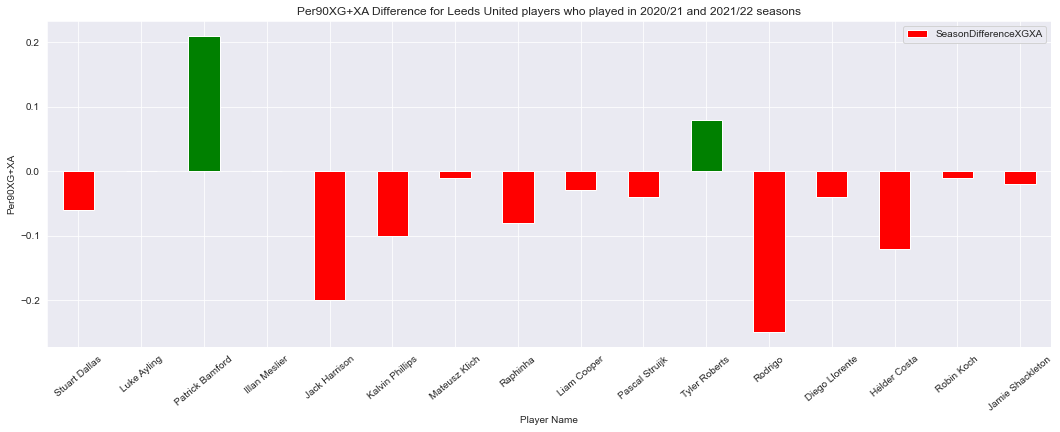

In [32]:
result.plot.bar(x = 'Name', y = 'SeasonDifferenceXGXA', rot = 40, figsize=(18, 6),
                title = 'Per90XG+XA Difference for Leeds United players who played in 2020/21 and 2021/22 seasons',
                ylabel = 'Per90XG+XA', xlabel = 'Player Name',
                color=(result['SeasonDifferenceXGXA'] > 0).map({True: 'g', False: 'r'}))

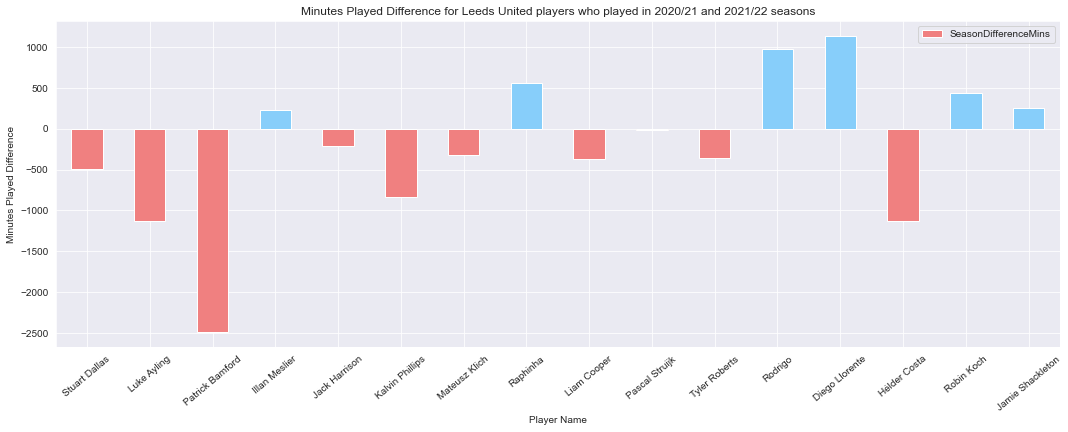

In [33]:
result.plot.bar(x = 'Name', y = "SeasonDifferenceMins", rot = 40, figsize = (18, 6),
                title = 'Minutes Played Difference for Leeds United players who played in 2020/21 and 2021/22 seasons',
                ylabel = 'Minutes Played Difference', xlabel = 'Player Name',
                color = (result['SeasonDifferenceMins'] > 0).map({True: 'lightskyblue', False: 'lightcoral'}))
fig.patch.set_facecolor('white')

### Key takeaways
It is particularly interesting to note that xG and xA numbers per 90 dropped for every Leeds United player who played across the two seasons bar two. These two, in particular, Patrick Bamford had a significantly reduced number of minutes than the previous season. Bamford was Leeds' regular supply of goals and judging by his numbers here was set for another strong season before lengthy injuries impacted him for most of the season. Key attackers such as Raphinha, Jack Harrison and Rodrigo all had a far worse xG+xA per 90 in the 2021-22 season. Rodrigo actually played far more in the second season than first but his attacking outputs showed the largest drop per 90 for any player who played the previous two seasons. A common theme is starting to emerge from this:
- Leeds United players for the most part played way above levels previously shown by them in their first season. A regression to the mean occurred in the 2nd season.
- An increased squad turnover in playing staff appeared to also have an impact. Most players saw a noticeable reduction in minutes while the club used 6 more players and hadn't invested heavily in the 2021 summer window. This lack of a settled team and more injuries appeared a factor in the worse performance of the team.

We will now focus on the defensive aspects of Leeds' first two seasons in the Premier League post promotion. We will look at how their goalkeepers performed over the two seasons and look at aspects of their defensive play also.

### Goalkeeper Analysis

While an unglamorous position, having a good goalkeeper, particularly if a team is at the wrong end of the table can save them multiple points. Leeds United have had an undisputed first choice goalkeeper in these two seasons in Illan Meslier. An unusually young keeper in the premier league, he has attracted a lot of plaudits since Leeds won promotion in 2020. Here we will see if his numbers were actually saving Leeds points or not.

In [34]:
gkseason1 = pd.read_csv("datasets/cleanedAdvanced/leeds-adkeeper2021-cleaned.csv")
gkseason2 = pd.read_csv("datasets/cleanedAdvanced/leeds-adkeeper2122-cleaned.csv")

In [35]:
gkseason1.head()

,Player,Nation,Pos,Age,90s,GA,PKA,FK,CK,OG,...,PassesAvgLen,GoalKickAtt,GoalKickLaunch%,GoalKickAvgLen,CrossesOpp,CrossesStp,CrossesStp%,Sweep#OPA,Sweep#OPA/90,SweepAvgDist
0,Illan Meslier,fr FRA,GK,20.0,35.0,52,8,1,11,2,...,27.4,267,33.3,29.4,447,24,5.4,19,0.54,11.9
1,Kiko Casilla,es ESP,GK,33.0,3.0,2,0,0,0,0,...,23.2,31,22.6,24.7,30,4,13.3,1,0.33,10.8
2,Squad Total,NaN,NaN,26.1,38.0,54,8,1,11,2,...,27.1,298,32.2,28.9,477,28,5.9,20,0.53,11.8


In [36]:
gkseason1.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'GA', 'PKA', 'FK', 'CK', 'OG',
       'ExpectedPSxG', 'ExpectedPSxG/SoT', 'ExpectedPSxG+/-', 'Expected/90',
       'LaunchedCmp', 'LaunchedAtt', 'LaunchedCmp%', 'PassesAtt', 'PassesThr',
       'PassesLaunch%', 'PassesAvgLen', 'GoalKickAtt', 'GoalKickLaunch%',
       'GoalKickAvgLen', 'CrossesOpp', 'CrossesStp', 'CrossesStp%',
       'Sweep#OPA', 'Sweep#OPA/90', 'SweepAvgDist'],
      dtype='object')

In [37]:
def compare_seasons(dffirst, dfsecond, col1, col2, string1, string2):
    # leave out last line , as this has squad totals, this function is used for player comparison across two seasons
    leavelastline_firstseason = dffirst[:-1]
    leavelastline_secondseason = dfsecond[:-1]
    season1 = list(leavelastline_firstseason[col1])
    season2 = list(leavelastline_secondseason[col1])
    dict1 = {}
    dict2 = {}
    for i in range(len(season1)):
        if season1[i] in season2:
            dict1[season1[i]] = leavelastline_firstseason.loc[leavelastline_firstseason[col1] == season1[i], col2].item()
            dict2[season1[i]] = leavelastline_secondseason.loc[leavelastline_secondseason[col1] == season1[i], col2].item()
        else:
            continue

    firstseason = pd.DataFrame.from_dict(dict1, orient = 'index')
    firstseason = firstseason.reset_index()
    firstseason.rename(columns = {'index': 'Name', 0: string1}, inplace = True)
    secondseason = pd.DataFrame.from_dict(dict2, orient = 'index')
    secondseason = secondseason.reset_index()
    secondseason.rename(columns = {'index': 'Name', 0: string2}, inplace = True)
    resultdf = pd.merge(firstseason, secondseason, on = ["Name"])
    return resultdf

In [38]:
def compare_seasons_all(dffirst, dfsecond, col1, col2, string1, string2):
    leavelastline_firstseason = dffirst
    leavelastline_secondseason = dfsecond
    season1 = list(leavelastline_firstseason[col1])
    season2 = list(leavelastline_secondseason[col1])
    dict1 = {}
    dict2 = {}
    for i in range(len(season1)):
        if season1[i] in season2:
            dict1[season1[i]] = leavelastline_firstseason.loc[leavelastline_firstseason[col1] == season1[i], col2].item()
            dict2[season1[i]] = leavelastline_secondseason.loc[leavelastline_secondseason[col1] == season1[i], col2].item()
        else:
            continue

    firstseason = pd.DataFrame.from_dict(dict1, orient = 'index')
    firstseason = firstseason.reset_index()
    firstseason.rename(columns = {'index': 'Name', 0: string1}, inplace = True)
    secondseason = pd.DataFrame.from_dict(dict2, orient = 'index')
    secondseason = secondseason.reset_index()
    secondseason.rename(columns = {'index': 'Name', 0: string2}, inplace = True)
    resultdf = pd.merge(firstseason, secondseason, on = ["Name"])
    return resultdf

In [39]:
keepersmerged = compare_seasons_all(gkseason1, gkseason2, 'Player', 'ExpectedPSxG+/-', '20-21ExpectedPSxG+/-', '21-22ExpectedPSxG+/-')

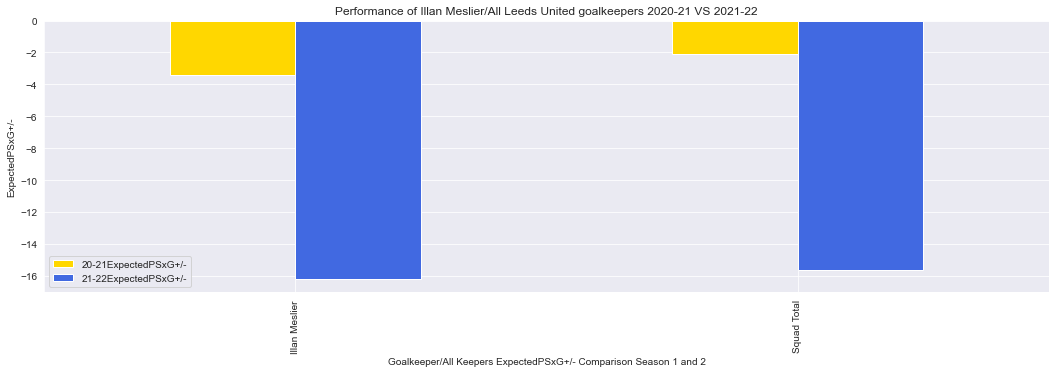

In [40]:
plt.rcParams["figure.figsize"] = (18,5)
data_chart = keepersmerged.set_index('Name').plot.bar(color = (keepersmerged['Name']).map({'Illan Meslier': 'gold', 'Squad Total': 'royalblue'}))
data_chart.set_xlabel('Goalkeeper/All Keepers ExpectedPSxG+/- Comparison Season 1 and 2')
data_chart.set_ylabel('ExpectedPSxG+/-')
data_chart.set_title('Performance of Illan Meslier/All Leeds United goalkeepers 2020-21 VS 2021-22')
plt.show()

This chart reveals quite a stark contrast in goalkeeping performance between the two seasons in question. In Leeds' first season they were only marginally conceding more goals than expected (about 2 more for the whole squad, Kiko Casilla played 3 times that season). However, in the second season we see a huge drop off in performance. While Leeds would have been expected to concede far more goals this season than before anyway, they conceded approximately 16 more goals than would be reasonably expected given the quality of the opposition's chances. This, along with our findings earlier regarding xG and xA would suggest Leeds players performed way above their typical level of quality in their first season back up and they saw a "regression to the mean" in their second season.

In [41]:
keepersmerged1 = compare_seasons_all(gkseason1, gkseason2, 'Player', 'PassesLaunch%', '20-21PassesLaunch', '21-22PassesLaunch')

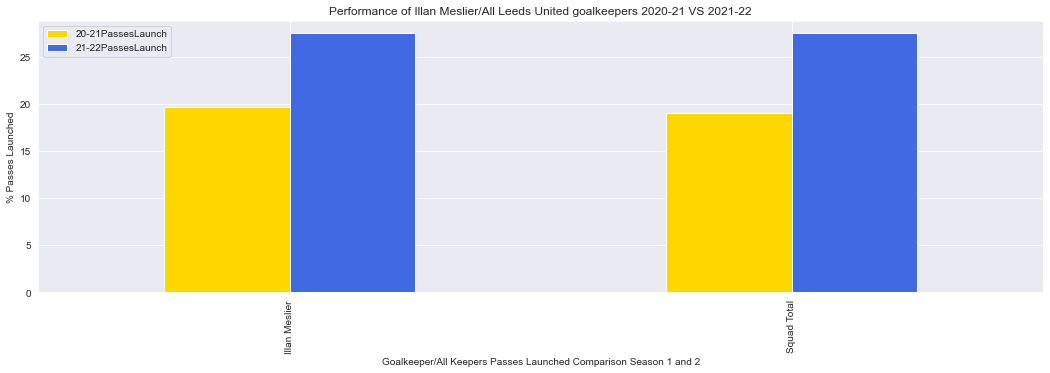

In [42]:
plt.rcParams["figure.figsize"] = (18,5)
data_chart = keepersmerged1.set_index('Name').plot.bar(color = (keepersmerged1['Name']).map({'Illan Meslier': 'gold', 'Squad Total': 'royalblue'}))
data_chart.set_xlabel('Goalkeeper/All Keepers Passes Launched Comparison Season 1 and 2')
data_chart.set_ylabel('% Passes Launched')
data_chart.set_title('Performance of Illan Meslier/All Leeds United goalkeepers 2020-21 VS 2021-22')
plt.show()

### Defensive Actions

In [43]:
defensivelee2021 = pd.read_csv("datasets/cleanedAdvanced/leeds-defensive2021-cleaned.csv")
defensivelee2122 = pd.read_csv("datasets/cleanedAdvanced/leeds-defensive2122-cleaned.csv")

In [44]:
defensivelee2021.head(1)

,Player,Nation,Pos,Age,90s,Tkl,TklWon,TacklesDef3rd,TacklesMid3rd,TacklesAtt3rd,...,VSDribblesAtt,VSDribblesTkl%,VSDribblesPast,Blocks,ShotBlock,PassBlock,Interceptions,Tkl+Int,Clearances,Errors
0,Stuart Dallas,nir NIR,MFDF,29.0,37.9,74,45,46,22,6,...,88,34.1,58,41,3,38,44,118,52,1


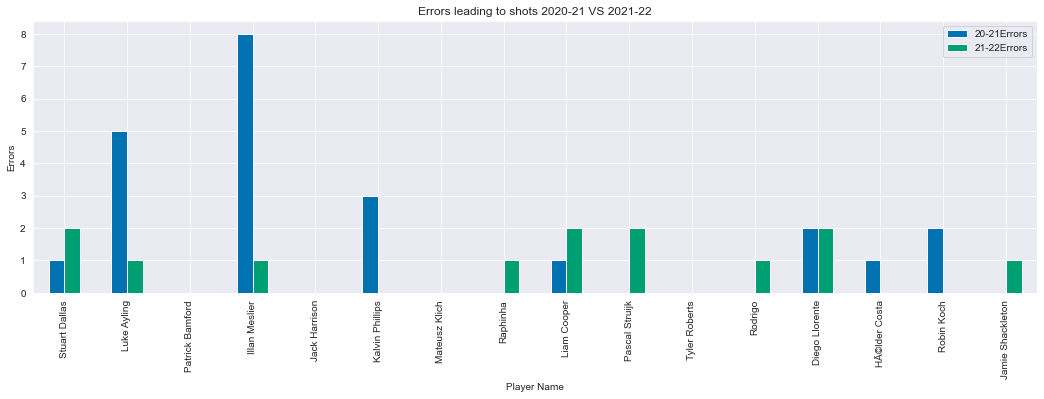

In [45]:
errorsdf = compare_seasons(defensivelee2021, defensivelee2122, 'Player', 'Errors', '20-21Errors', '21-22Errors')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = errorsdf.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Errors')
data_chart.set_title('Errors leading to shots 2020-21 VS 2021-22')
plt.show()

It is very interesting to note among players who played in both seasons that the number of errors leading to shots drastically decreased (from 25 to 16) between the two seasons. This would suggest that defensive errors were not paramount in Leeds' second season decline when compared to some of our previous statistics.

### Discipline

In [46]:
discipline_firstseason = pd.read_csv("datasets/cleanedAdvanced/leeds-miscell2021-cleaned.csv")
discipline_secondseason = pd.read_csv("datasets/cleanedAdvanced/leeds-miscell2122-cleaned.csv")

In [47]:
discipline_firstseason.tail(2)

,Player,Nation,Pos,Age,90s,CrdY,CrdR,2CrdY,Fls,Fld,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,AerialDuelWon,AerielDuelLost,AerialDuelWon%
22,Leif Davis,eng ENG,DF,20.0,0.4,0,0,0,1,0,...,0,1,0,0,0,0,3,0,1,0.0
23,Squad Total,NaN,NaN,26.1,38.0,61,1,0,432,410,...,786,397,417,3,9,2,2160,538,605,47.1


In [48]:
discipline_firstseason.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'CrdY', 'CrdR', '2CrdY', 'Fls',
       'Fld', 'Off', 'Crs', 'Int', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov',
       'AerialDuelWon', 'AerielDuelLost', 'AerialDuelWon%'],
      dtype='object')

In [49]:
discipline_firstseason_cards1 = discipline_firstseason[-1:]

In [50]:
discipline_secondseason_cards2 = discipline_secondseason[-1:]

In [51]:
discipline_firstseason_cards = discipline_firstseason_cards1[['Player', 'CrdY', 'CrdR']]
discipline_secondseason_cards = discipline_secondseason_cards2[['Player', 'CrdY', 'CrdR']]

In [52]:
discipline_firstseason_cards = discipline_firstseason_cards.replace("Squad Total", "Season 1 Total")
discipline_secondseason_cards = discipline_secondseason_cards.replace("Squad Total", "Season 2 Total")

In [53]:
overall_discipline = pd.concat([discipline_firstseason_cards, discipline_secondseason_cards])

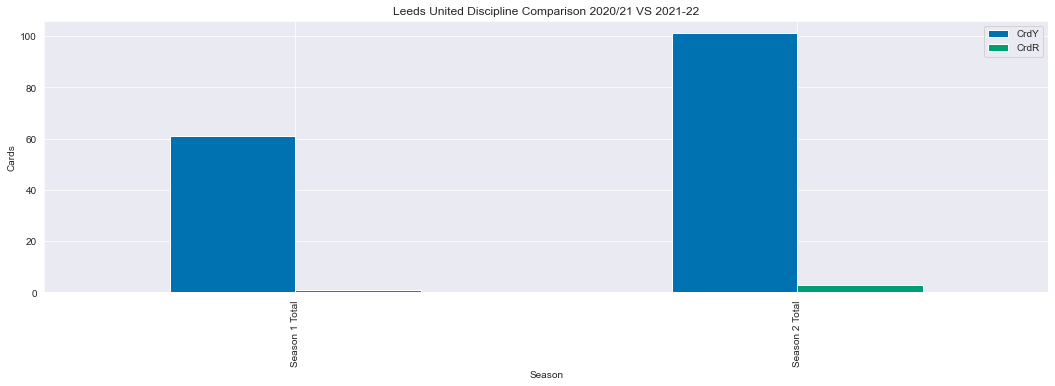

In [54]:
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_discipline.set_index('Player').plot.bar()
data_chart.set_xlabel('Season')
data_chart.set_ylabel('Cards')
data_chart.set_title('Leeds United Discipline Comparison 2020/21 VS 2021-22')
plt.show()

In [55]:
# aerial duels comparison
discipline_firstseason_duels = discipline_firstseason_cards1[['Player', 'AerialDuelWon%']]
discipline_secondseason_duels = discipline_secondseason_cards2[['Player', 'AerialDuelWon%']]

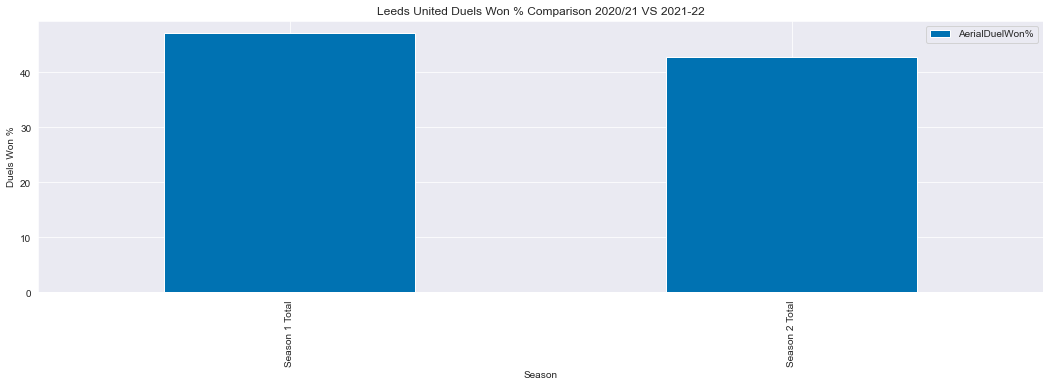

In [56]:
discipline_firstseason_duels = discipline_firstseason_duels.replace("Squad Total", "Season 1 Total")
discipline_secondseason_duels = discipline_secondseason_duels.replace("Squad Total", "Season 2 Total")
overall_duels = pd.concat([discipline_firstseason_duels, discipline_secondseason_duels])
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_duels.set_index('Player').plot.bar()
data_chart.set_xlabel('Season')
data_chart.set_ylabel('Duels Won %')
data_chart.set_title('Leeds United Duels Won % Comparison 2020/21 VS 2021-22')
plt.show()

### XG Comparison - For/Against

We will now look at the total xG for and conceded by Leeds United as an entire squad over the two seasons. This will allow us to judge Leeds' numbers better against the opposition. As we have already found they were putting up a high xG for a newly promoted team but they were also concededing at a noticeable rate, with a sharp defensive decline in their second season. This should provide us better context for their numbers.

In [57]:
for_against_2021 = dftotals1.iloc[-2:]
for_against_2122 = dftotals2.iloc[-2:]

In [58]:
comp1 = for_against_2021[['Player', 'Gls', 'xG']]
comp2 = for_against_2122[['Player', 'Gls', 'xG']]

In [59]:
comp1.replace({'Squad Total': 'SquadTotalSeason1', 'Opponent Total': 'OpponentTotalSeason1'}, inplace = True)
comp2.replace({'Squad Total': 'SquadTotalSeason2', 'Opponent Total': 'OpponentTotalSeason2'}, inplace = True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


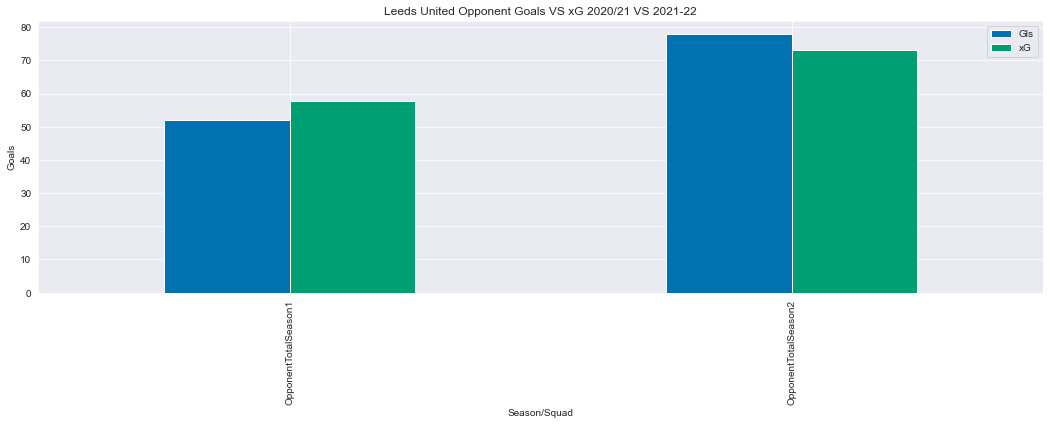

In [60]:
overall_xg = pd.concat([comp1, comp2])
overall_xg_opp = overall_xg.loc[overall_xg['Player'].str.contains('Opponent')]
overall_xg_opp = overall_xg_opp.sort_values('Player')
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_xg_opp.set_index('Player').plot.bar()
data_chart.set_xlabel('Season/Squad')
data_chart.set_ylabel('Goals')
data_chart.set_title('Leeds United Opponent Goals VS xG 2020/21 VS 2021-22')
plt.show()

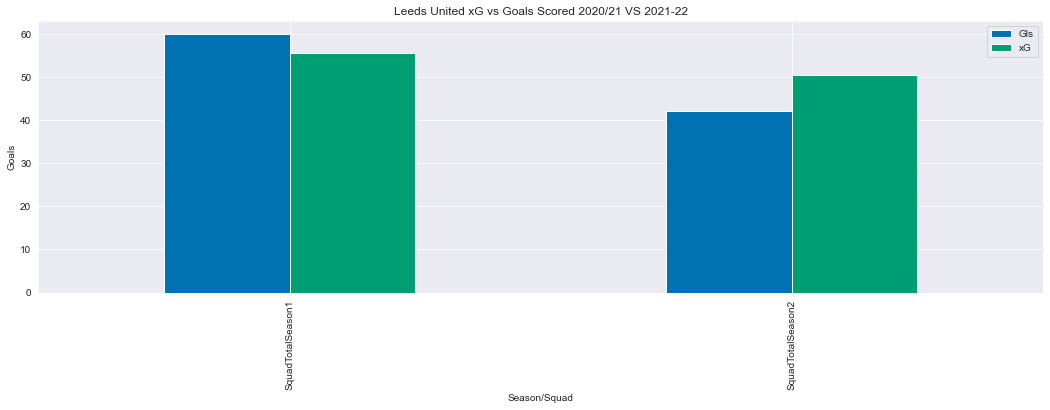

In [61]:
overall_xg_lee = overall_xg.loc[overall_xg['Player'].str.contains('SquadTotalSeason')]
overall_xg_lee = overall_xg_lee.sort_values('Player')
plt.rcParams["figure.figsize"] = (18, 5)
plt.style.use('seaborn-colorblind') 
data_chart = overall_xg_lee.set_index('Player').plot.bar()
data_chart.set_xlabel('Season/Squad')
data_chart.set_ylabel('Goals')
data_chart.set_title('Leeds United xG vs Goals Scored 2020/21 VS 2021-22')
plt.show()

### Key Observations
We can see from our graphs above the stark contrast between the 2 seasons. Looking at our two values on our first graph which focuses on the opponents xG (conceded xG), we see that Leeds outperformed their xG in season 1 (conceded less than they should have) but appeared to concede more than they should have the following season by about the same difference. The goals scored Vs xG values for Leeds' squad in the second graph show a similar trend, with a slight overperformance followed by a more pronounced underperformance in season 2. This further suggests the "regression to the mean" theory we alluded to earlier and shows that Leeds numbers were most likely unsustainable given the calibre of players they possess.

### Goal and Shot Creation

Next, we will investigate if Leeds United had any noticeable reduction with regards goal and shot creation amongst players who played across the two seasons. Leeds had a very similar squad in terms of key players across the two seasons so this comparison is certainly valid. Goal/Shot creation actions can be defined as "meaning the two offensive leading to a shot or goal. This includes live-ball passes, dead-ball passes, successful dribbles, shots which lead to another shot, and being fouled." This again will allow us to see if Leeds struggled in their second season to create meaningful chances and if the goals they did score required more luck for example. If there are high GCA or SCA values it can be assumed that a team is able to break defences down and create chances better in open play or are well rehearsed on set pieces.

In [62]:
shotcreate_firstseason = pd.read_csv("datasets/cleanedAdvanced/leeds-shootcreate2021-cleaned.csv")
shotcreate_secondseason = pd.read_csv("datasets/cleanedAdvanced/leeds-shootcreate2122-cleaned.csv")

In [63]:
shotcreate_firstseason.head()

,Player,Nation,Pos,Age,90s,SCA,SCA90,PassLive,PassDead,Drib,...,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1
0,Stuart Dallas,nir NIR,MFDF,29.0,37.9,89,2.35,75,3,4,...,1,2,7,0.18,7,0,0,0,0,0
1,Luke Ayling,eng ENG,DF,28.0,37.8,52,1.38,43,2,3,...,3,0,4,0.11,4,0,0,0,0,0
2,Patrick Bamford,eng ENG,FW,26.0,33.9,65,1.92,46,0,5,...,4,0,16,0.47,9,0,2,2,3,0
3,Illan Meslier,fr FRA,GK,20.0,35.0,7,0.20,4,2,0,...,1,0,1,0.03,1,0,0,0,0,0
4,Jack Harrison,eng ENG,MFFW,23.0,31.6,117,3.70,96,8,5,...,1,0,15,0.47,12,1,2,0,0,0


In [64]:
shotcreate_firstseason1 = shotcreate_firstseason[['Player', 'Pos', 'SCA', 'SCA90', 'GCA', 'GCA90']]
shotcreate_secondseason2 = shotcreate_secondseason[['Player', 'Pos', 'SCA', 'SCA90', 'GCA', 'GCA90']]

In [65]:
shotcreate_firstseason1 = shotcreate_firstseason1[:-1]
shotcreate_secondseason2 = shotcreate_secondseason2[:-1]

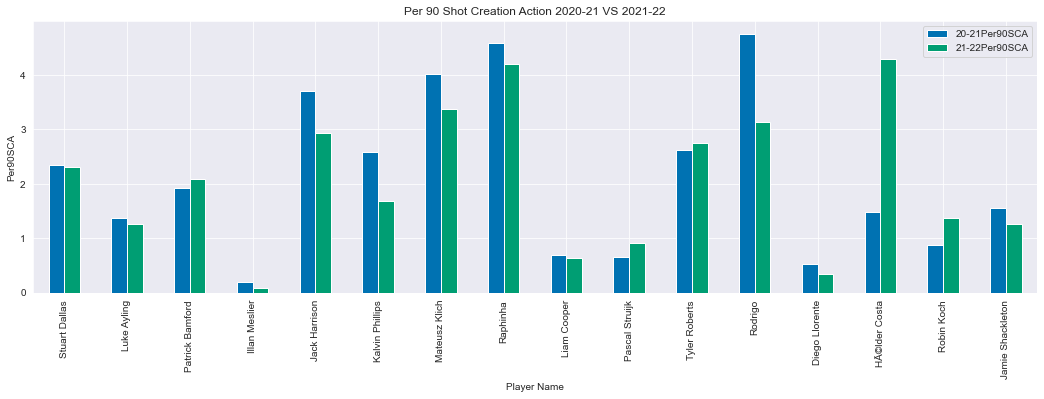

In [66]:
resultsca = compare_seasons(shotcreate_firstseason1, shotcreate_secondseason2, 'Player', 'SCA90', '20-21Per90SCA', '21-22Per90SCA')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = resultsca.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Per90SCA')
data_chart.set_title('Per 90 Shot Creation Action 2020-21 VS 2021-22')
plt.show()

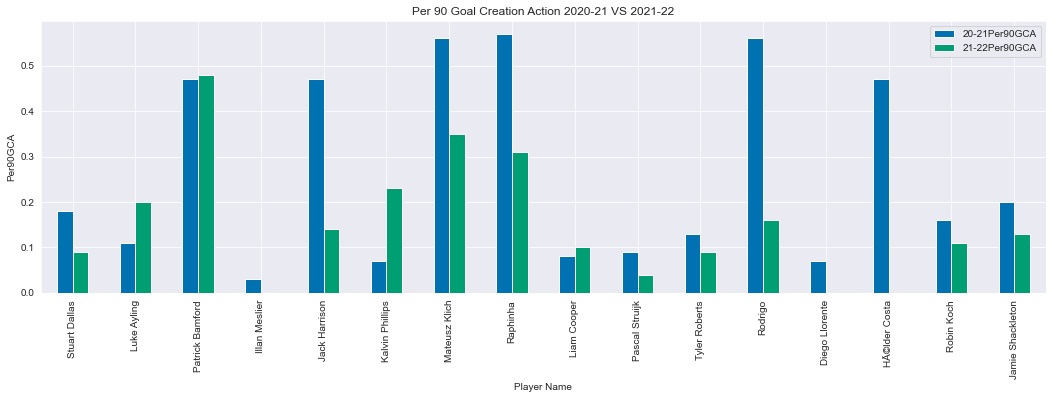

In [67]:
resultgca = compare_seasons(shotcreate_firstseason1, shotcreate_secondseason2, 'Player', 'GCA90', '20-21Per90GCA', '21-22Per90GCA')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = resultgca.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Per90GCA')
data_chart.set_title('Per 90 Goal Creation Action 2020-21 VS 2021-22')
plt.show()

### Observations from 90 minute SCA/GCA

What stands out immediately is Leeds' key attacking players such as Rodrigo, Raphinha and Jack Harrison (key midfielder Mateusz Klich also) had huge 90 minute goal creation action drops in the second season. These players also saw a drop in SCA values per 90 though not as pronounced. This would suggest that the quality of delivery or lack of attacking cohesion that saw Leeds impress in their first season was not near as evident in season 2.

In [68]:
## average xg per shot? DONE
## interceptions and tackles - look at if drop of these coincides with drop in overall team performance
## hinton diagrams based on passing types? could be used to compare all teams in end on diff metrics?
## create interceptions per 90 metric also? could be used to look at intensity? DONE
## team success xg and actual from first season, see who appeared key and see if they missed lot of season 2

In [69]:
defensivelee2021.head(1)

,Player,Nation,Pos,Age,90s,Tkl,TklWon,TacklesDef3rd,TacklesMid3rd,TacklesAtt3rd,...,VSDribblesAtt,VSDribblesTkl%,VSDribblesPast,Blocks,ShotBlock,PassBlock,Interceptions,Tkl+Int,Clearances,Errors
0,Stuart Dallas,nir NIR,MFDF,29.0,37.9,74,45,46,22,6,...,88,34.1,58,41,3,38,44,118,52,1


In [70]:
lst_results = []
def create_90_val(df, col1, col2, lst):
    nineties = list(df[col1])
    metric = list(df[col2])
    for i in range(len(nineties)):
        if nineties[i] > 0:
            val_per_90 = metric[i] / nineties[i]
            lst.append(val_per_90)
        else:
            lst.append(0)
    return lst

In [71]:
val2021 = create_90_val(defensivelee2021, '90s', 'Interceptions', lst_results)
defensivelee2021['InterceptionsPer90'] = val2021

In [72]:
lst_res2 = []
val2122 = create_90_val(defensivelee2122, '90s', 'Interceptions', lst_res2)
defensivelee2122['InterceptionsPer90'] = val2122

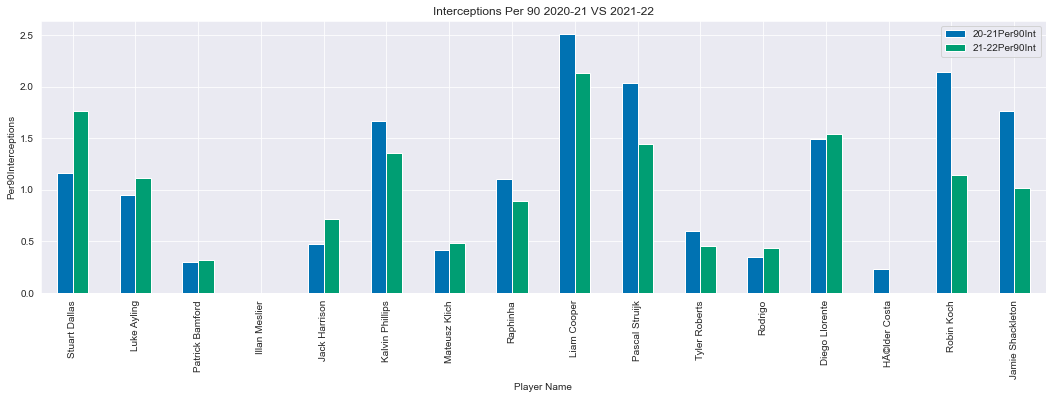

In [73]:
interceptions_per_90_comp = compare_seasons(defensivelee2021, defensivelee2122, 'Player', 'InterceptionsPer90', '20-21Per90Int', '21-22Per90Int')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = interceptions_per_90_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Per90Interceptions')
data_chart.set_title('Interceptions Per 90 2020-21 VS 2021-22')
plt.show()

### xG Per Shot

In [74]:
shot_firstseason = pd.read_csv("datasets/cleanedAdvanced/leeds-shoot2021-cleaned.csv")
shot_secondseason = pd.read_csv("datasets/cleanedAdvanced/leeds-shoot2122-cleaned.csv")

In [75]:
shot_firstseason.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'Gls', 'Sh', 'SoT', 'SoT%',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'],
      dtype='object')

In [76]:
## shots total does not include penalties

In [77]:
lst_res3 = []
shotfirst = create_90_val(shot_firstseason, 'Sh', 'xG', lst_res3)
shot_firstseason['xGPerShot'] = shotfirst

In [78]:
shot_firstseason.head(1)

,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,xGPerShot
0,Stuart Dallas,nir NIR,MFDF,29.0,37.9,8,48,18,37.5,1.27,...,20.5,0,0,0,4.2,4.2,0.09,3.8,3.8,0.0875


In [79]:
lst_res4 = []
shotsecond = create_90_val(shot_secondseason, 'Sh', 'xG', lst_res4)
shot_secondseason['xGPerShot'] = shotsecond

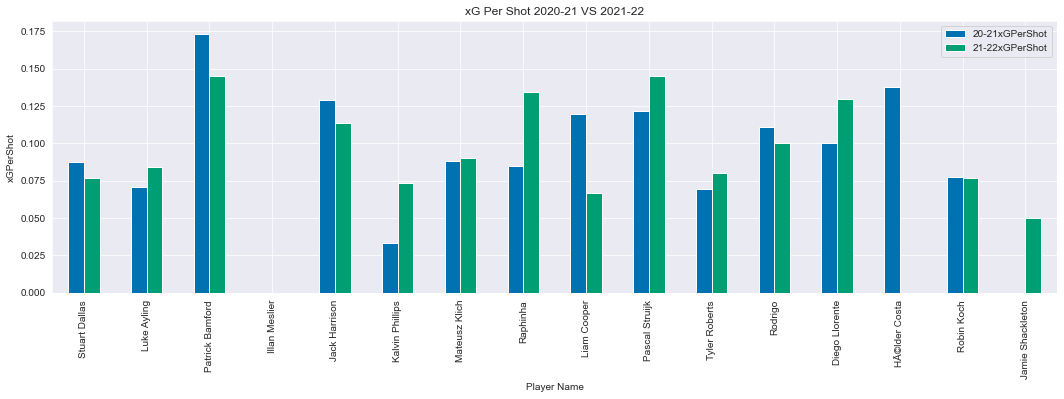

In [80]:
xg_per_shot_comp = compare_seasons(shot_firstseason, shot_secondseason, 'Player', 'xGPerShot', '20-21xGPerShot', '21-22xGPerShot')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = xg_per_shot_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('xGPerShot')
data_chart.set_title('xG Per Shot 2020-21 VS 2021-22')
plt.show()

### Passing Breakdown

In [100]:
pass_firstseason = pd.read_csv('datasets/cleanedAdvanced/leeds-pass2021-cleaned.csv')
pass_secondseason = pd.read_csv('datasets/cleanedAdvanced/leeds-pass2122-cleaned.csv')

In [101]:
pass_firstseason.columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'CmpTotal', 'AttemptedTotal',
       'Cmp%Total', 'TotDist', 'ProgressiveDist', 'ShortCmp', 'ShortAttempted',
       'ShortCmp%', 'MediumCmp', 'MediumAttempt', 'MediumCmp%', 'LongCmp',
       'LongAttempted', 'LongCmp%', 'Assists', 'xAG', 'xA', 'A-xAG',
       'KeyPasses', 'CompletedFinalThird', 'PassesPenaltyArea', 'CrossesPA',
       'ProgressivePasses'],
      dtype='object')

In [102]:
pass_firstseason.head(1)

,Player,Nation,Pos,Age,90s,CmpTotal,AttemptedTotal,Cmp%Total,TotDist,ProgressiveDist,...,LongCmp%,Assists,xAG,xA,A-xAG,KeyPasses,CompletedFinalThird,PassesPenaltyArea,CrossesPA,ProgressivePasses
0,Stuart Dallas,nir NIR,MFDF,29.0,37.9,1830,2235,81.9,27976,8737,...,52.9,2,1.8,2.2,0.2,26,154,38,8,143


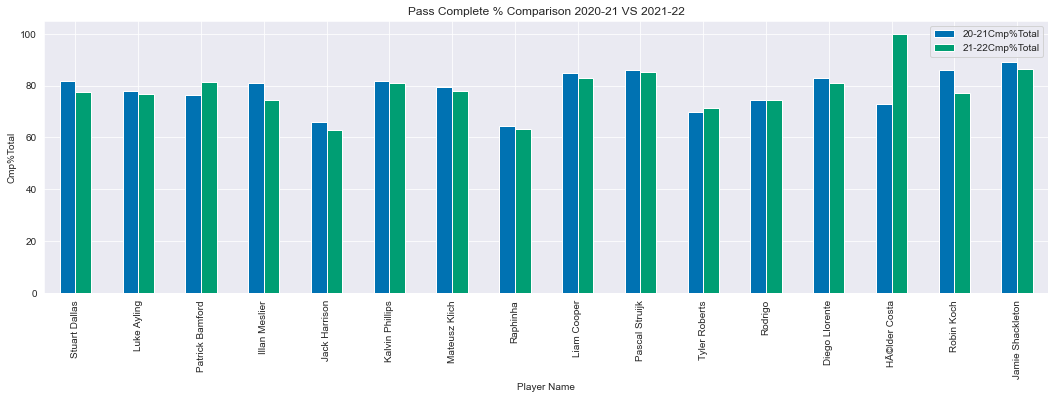

In [103]:
pass_cmp_comp = compare_seasons(pass_firstseason, pass_secondseason, 'Player', 'Cmp%Total', '20-21Cmp%Total', '21-22Cmp%Total')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = pass_cmp_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('Cmp%Total')
data_chart.set_title('Pass Complete % Comparison 2020-21 VS 2021-22')
plt.show()

In [104]:
### add more comments later for above.
#### lets investigate how many more long balls were attempted as a % of attempted passes -> potential loss of control if higher
#### average progressive distance of passes too

In [105]:
lst_res5 = []
progpassfirst = create_90_val(pass_firstseason, 'CmpTotal', 'ProgressiveDist', lst_res5)
pass_firstseason['AvgProgressiveDist'] = progpassfirst

In [106]:
lst_res6 = []
progpasssecond = create_90_val(pass_secondseason, 'CmpTotal', 'ProgressiveDist', lst_res6)
pass_secondseason['AvgProgressiveDist'] = progpasssecond

In [107]:
pass_secondseason.head(1)

,Player,Nation,Pos,Age,90s,CmpTotal,AttemptedTotal,Cmp%Total,TotDist,ProgressiveDist,...,Assists,xAG,xA,A-xAG,KeyPasses,CompletedFinalThird,PassesPenaltyArea,CrossesPA,ProgressivePasses,AvgProgressiveDist
0,Illan Meslier,fr FRA,GK,21.0,37.6,1037,1392,74.5,24030,14107,...,0,0.0,0.0,0.0,0,3,0,0,0,13.603664


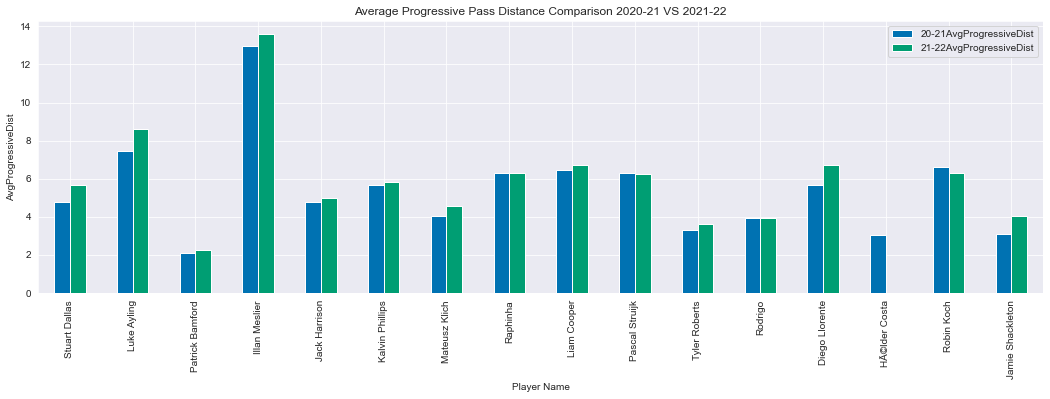

In [108]:
## compare average progression per pass completed over two season
avg_passdist_comp = compare_seasons(pass_firstseason, pass_secondseason, 'Player', 'AvgProgressiveDist', '20-21AvgProgressiveDist', '21-22AvgProgressiveDist')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = avg_passdist_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('AvgProgressiveDist')
data_chart.set_title('Average Progressive Pass Distance Comparison 2020-21 VS 2021-22')
plt.show()

In [109]:
### now for percentage long balls

In [110]:
lst_res8 = []
longpassfirst = create_90_val(pass_firstseason, 'AttemptedTotal', 'LongAttempted', lst_res8)
pass_firstseason['PercentageLongAtt'] = longpassfirst

In [111]:
lst_res9 = []
longpasssecond = create_90_val(pass_secondseason, 'AttemptedTotal', 'LongAttempted', lst_res9)
pass_secondseason['PercentageLongAtt'] = longpasssecond

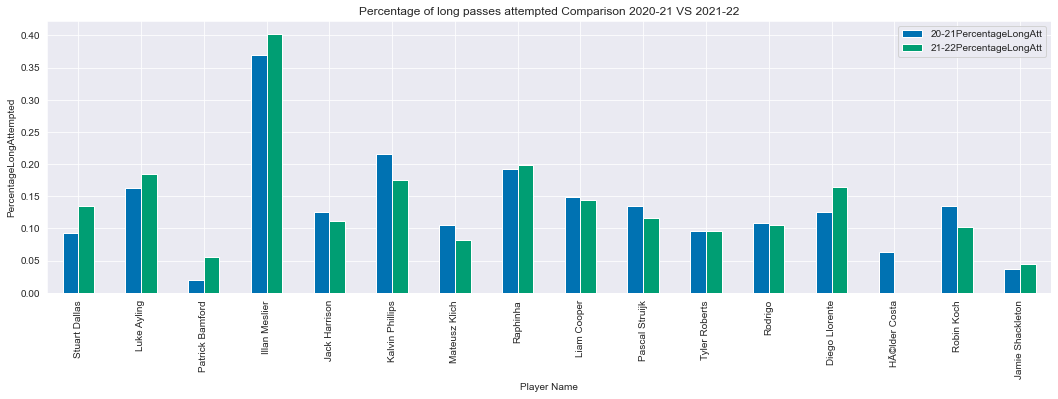

In [113]:
## compare attempted long passes as proportion of total attempted passes over two season
longpass_comp = compare_seasons(pass_firstseason, pass_secondseason, 'Player', 'PercentageLongAtt', '20-21PercentageLongAtt', '21-22PercentageLongAtt')
plt.rcParams["figure.figsize"] = (18,5)
plt.style.use('seaborn-colorblind') 
data_chart = longpass_comp.set_index('Name').plot.bar()
data_chart.set_xlabel('Player Name')
data_chart.set_ylabel('PercentageLongAttempted')
data_chart.set_title('Percentage of long passes attempted Comparison 2020-21 VS 2021-22')
plt.show()